<a href="https://colab.research.google.com/github/G-U-K/study-tasks/blob/master/ProjInfSys/OutOfCityGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
switches = {
    1 : (2,),
    2 : (1,2,3),
    3 : (4,2),
    4 : (5,3)
}

In [51]:
n_games = 10**6

switches = {np.int8(k):np.int8(v) for k,v in switches.items()}

In [41]:
def deb1(positions):
    for i in range(1,6):
        print(i,':',np.sum(positions==i))
    input()

In [56]:
def win_rate(start_pos:np.array,n_steps):
    for step in range(n_steps):
        # deb1(start_pos)
        tmp = start_pos.copy()
        for start,end in switches.items():
            overlap = start_pos == start
            tmp[overlap] = np.random.choice(end,np.sum(overlap))
        start_pos = tmp
    return np.sum(start_pos==5)/len(start_pos)

In [66]:
def win_rate_various(n_steps_to=40):
    results = []
    for n_steps in range(n_steps_to+1):
        print(n_steps,end=' ')
        results.append(win_rate(np.ones(n_games,np.int8),n_steps)*100)
    print(' ')
    return results

In [67]:
res = win_rate_various()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40  


In [73]:
print("При классической длине игры до 25 ходов вероятность выигрыша %2.2f %%"%res[25])

При классической длине игры до 25 ходов вероятность выигрыша 75.81 %


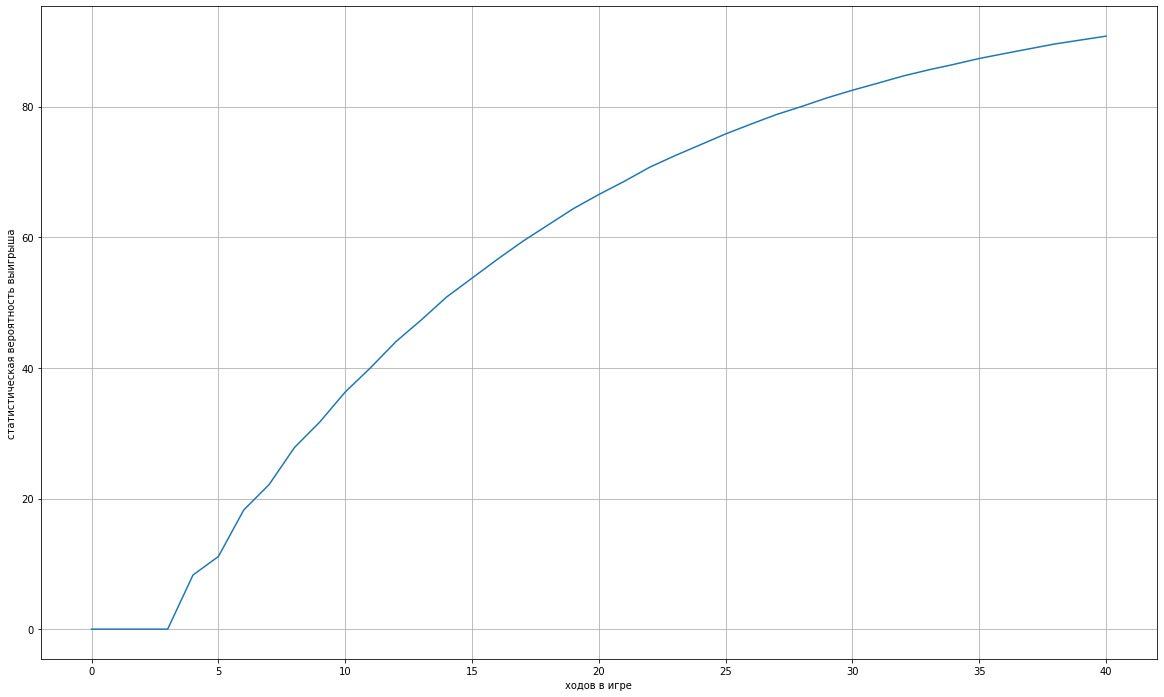

In [74]:
plt.figure(figsize=(20,12))
plt.axes(xlabel='ходов в игре',ylabel='статистическая вероятность выигрыша')
plt.grid(True,'both')
plt.plot(res)
plt.show()

# Более грамотный метод

In [112]:
def adv_win_rate(n_steps=25, positions = np.array([1.,0.,0.,0.,0.],dtype=np.float32)):
    movements = np.zeros(5,np.float32)
    for step in range(n_steps):
        movements.fill(0.)
        # from 1 ring
        movements[1] += positions[0]
        # from 2 ring
        movements[0:3] += positions[1]/3.
        # from 3 ring
        movements[1:4:2] += positions[2]/2.
        # from 4 ring
        movements[2:5:2] += positions[3]/2.
        # from 5 ring
        movements[4] += positions[4]
        # finish step
        positions = movements.copy()
    return positions[4]

In [113]:
adv_win_rate()

0.7580096